   PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ... UTILITY_AVAIL  STREET MZZONE  \
0         1.0       3  AbNormal        Yes  ...        AllPub   Paved      A   
1         1.0       5  AbNormal         No  ...        AllPub  Gravel     RH   
2         1.0       3  AbNormal        Yes  ...           ELO  Gravel     RL   
3         2.0       5    Family         No  ...       NoSewr    Paved      I   
4         1.0       3  AbNormal        Yes  ...        AllPub  Gravel      C   

  QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  
0

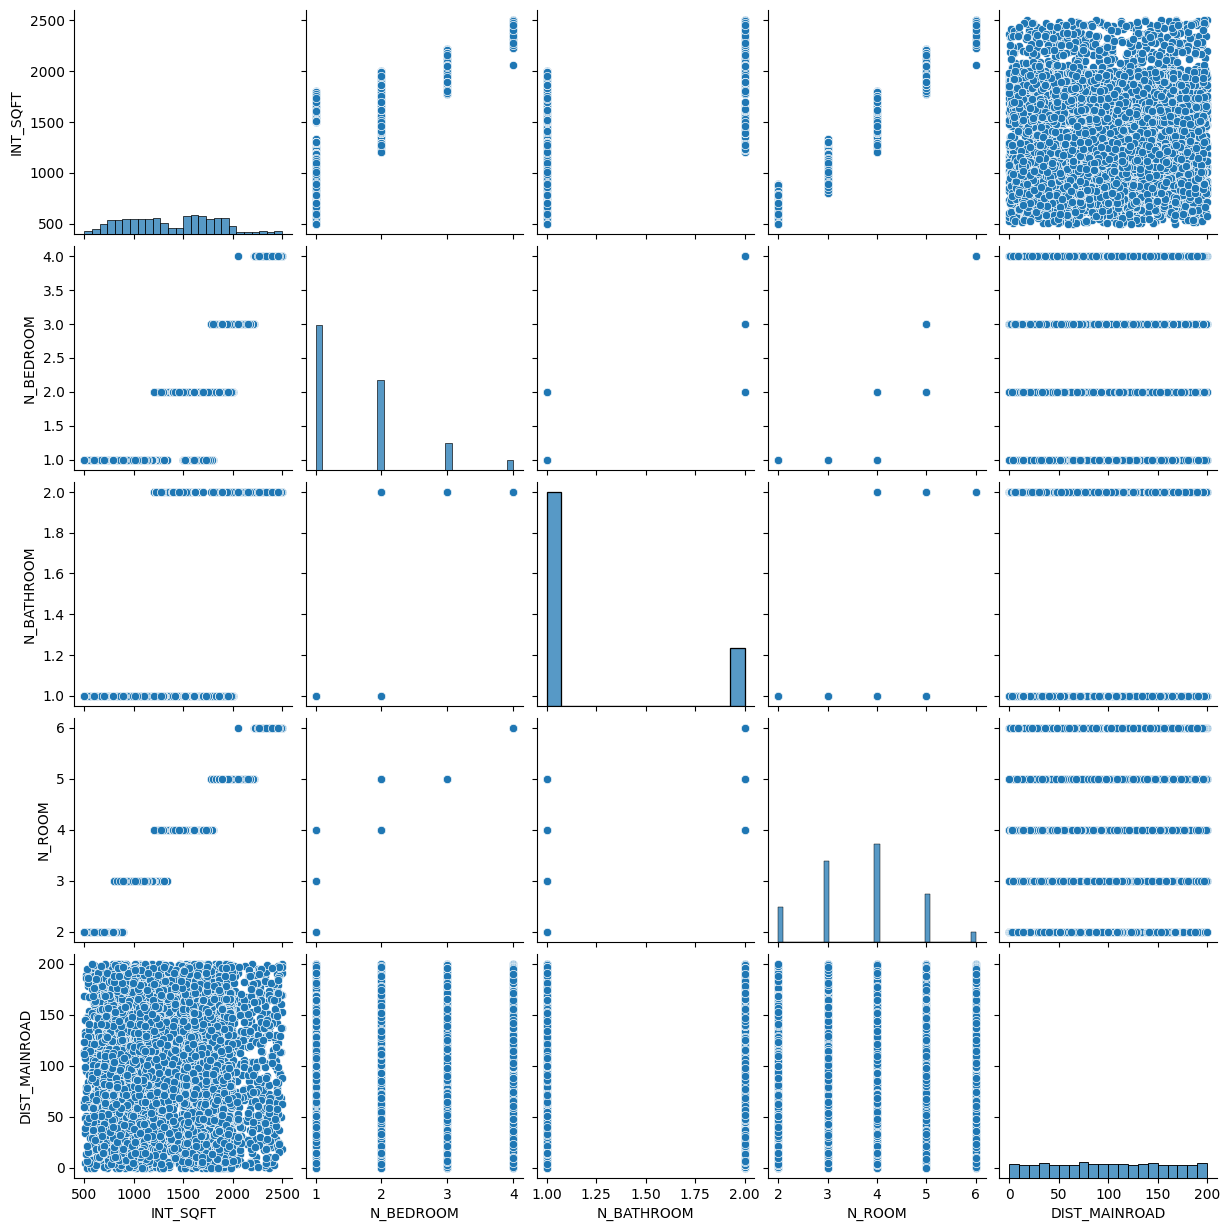

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Chennai housing sale.csv")

print(df.head())
print(df.info())
print(df.describe())

sns.pairplot(df[['INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'DIST_MAINROAD']])
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
X = df[['INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'DIST_MAINROAD']]
y = df['SALES_PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Select useful features and target
features = ['INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'DIST_MAINROAD']
target = 'SALES_PRICE'

X = df[features]
y = df[target]

# 2. Fill missing values with column mean
X = X.fillna(X.mean(numeric_only=True))
y = y.fillna(y.mean())

# 3. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Evaluate model performance
y_pred = model.predict(X_test)

print("Model Evaluation:")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

Model Evaluation:
R² Score: 0.4724471045357347
MAE: 2152662.053823959
MSE: 6930675060598.365
RMSE: 2632617.530253562


In [23]:
import joblib
joblib.dump(model, '../model.pkl')
print("model saved successfully as model.pkl")

model saved successfully as model.pkl
